<a href="https://colab.research.google.com/github/kavyansh07/MLCOE-TASK-1/blob/main/Riots%20Protest%20Dataset%202019-2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('/content/2016-2022.csv')
data

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8912977,356,IND107923,107923.0,18-Mar-22,2022,1,Riots,Mob violence,Rioters (India),...,Kishanpur,25.6422,81.0244,1.0,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0.0,1.647961e+09,IND
1,8912990,356,IND107846,107846.0,18-Mar-22,2022,1,Protests,Peaceful protest,Protesters (India),...,Mumbai - Azad Maidan,18.9388,72.8321,1.0,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0.0,1.647961e+09,IND
2,8913012,356,IND107941,107941.0,18-Mar-22,2022,1,Protests,Peaceful protest,Protesters (India),...,Ahmedgarh,30.6785,75.8272,1.0,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0.0,1.647961e+09,IND
3,8913089,356,IND107842,107842.0,18-Mar-22,2022,1,Protests,Peaceful protest,Protesters (India),...,Indore,22.7179,75.8333,1.0,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0.0,1.647961e+09,IND
4,8913091,356,IND107850,107850.0,18-Mar-22,2022,1,Riots,Mob violence,Rioters (India),...,Kanavar,26.5622,78.9797,1.0,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1.0,1.647961e+09,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31707,7124199,356,IND75220,75220.0,03-Jun-20,2020,1,Protests,Peaceful protest,Protesters (India),...,Fatehgarh Sahib,30.6276,76.3847,1.0,Chandigarh Tribune,Subnational,"On 3 June 2020, doctors, Punjab paramedical an...",0.0,1.591714e+09,IND
31708,7124205,356,IND75333,75333.0,03-Jun-20,2020,1,Violence against civilians,Attack,Police Forces of India (2014-) Central Reserve...,...,Chadoora,33.9459,74.7967,1.0,Daily Excelsior,Subnational,"On 3 June 2020, a doctor was assaulted and inj...",0.0,1.618502e+09,IND
31709,7124212,356,IND75335,75335.0,03-Jun-20,2020,1,Protests,Peaceful protest,Protesters (India),...,Kahara,33.0940,75.8704,2.0,Daily Excelsior,Subnational,"On 3 June 2020, locals protested near Wanipura...",0.0,1.618502e+09,IND
31710,7124213,356,IND75337,75337.0,03-Jun-20,2020,1,Battles,Armed clash,Military Forces of India (2014-),...,Kirni,33.7907,74.1579,2.0,Daily Excelsior,Subnational,"On 3 June 2020, military forces of India and P...",0.0,1.591714e+09,IND


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31712 entries, 0 to 31711
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           31712 non-null  int64  
 1   iso               31712 non-null  int64  
 2   event_id_cnty     31712 non-null  object 
 3   event_id_no_cnty  31712 non-null  float64
 4   event_date        31712 non-null  object 
 5   year              31712 non-null  int64  
 6   time_precision    31712 non-null  int64  
 7   event_type        31712 non-null  object 
 8   sub_event_type    31712 non-null  object 
 9   actor1            31712 non-null  object 
 10  assoc_actor_1     25812 non-null  object 
 11  inter1            31712 non-null  int64  
 12  actor2            7047 non-null   object 
 13  assoc_actor_2     2794 non-null   object 
 14  inter2            31712 non-null  int64  
 15  interaction       31712 non-null  int64  
 16  region            31712 non-null  object

In [8]:
data.describe()


,data_id,iso,event_id_no_cnty,year,time_precision,inter1,inter2,interaction,latitude,longitude,geo_precision,fatalities,timestamp
count,3.171200e+04,31712.0,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,31711.000000,31711.000000,31711.000000,31711.000000,3.171100e+04
mean,7.944333e+06,356.0,91640.430153,2020.734485,1.025700,5.537431,0.921670,53.194564,24.892497,79.995614,1.266658,0.062817,1.621921e+09
std,6.126763e+05,0.0,9515.165047,0.630007,0.158639,1.229692,2.183946,15.343254,7.129348,6.234116,0.493641,0.542686,1.419265e+07
min,7.124100e+06,356.0,75180.000000,2020.000000,1.000000,1.000000,0.000000,10.000000,7.007400,68.714000,1.000000,0.000000,1.591714e+09
25%,7.299872e+06,356.0,83321.750000,2020.000000,1.000000,6.000000,0.000000,60.000000,19.812300,75.271900,1.000000,0.000000,1.613515e+09
50%,7.813102e+06,356.0,91319.500000,2021.000000,1.000000,6.000000,0.000000,60.000000,26.452100,77.224400,1.000000,0.000000,1.618501e+09
75%,8.569018e+06,356.0,100015.250000,2021.000000,1.000000,6.000000,0.000000,60.000000,30.736200,83.609800,1.000000,0.000000,1.632856e+09
max,8.916039e+06,356.0,107943.000000,2022.000000,3.000000,8.000000,8.000000,80.000000,34.760500,96.994300,3.000000,58.000000,1.648134e+09


Let's check duplicate values

In [9]:
data[data.duplicated]

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3


Hence, there is no duplicate data in the dataset.

#DATA VISUALISATION

***Pair Pilot***

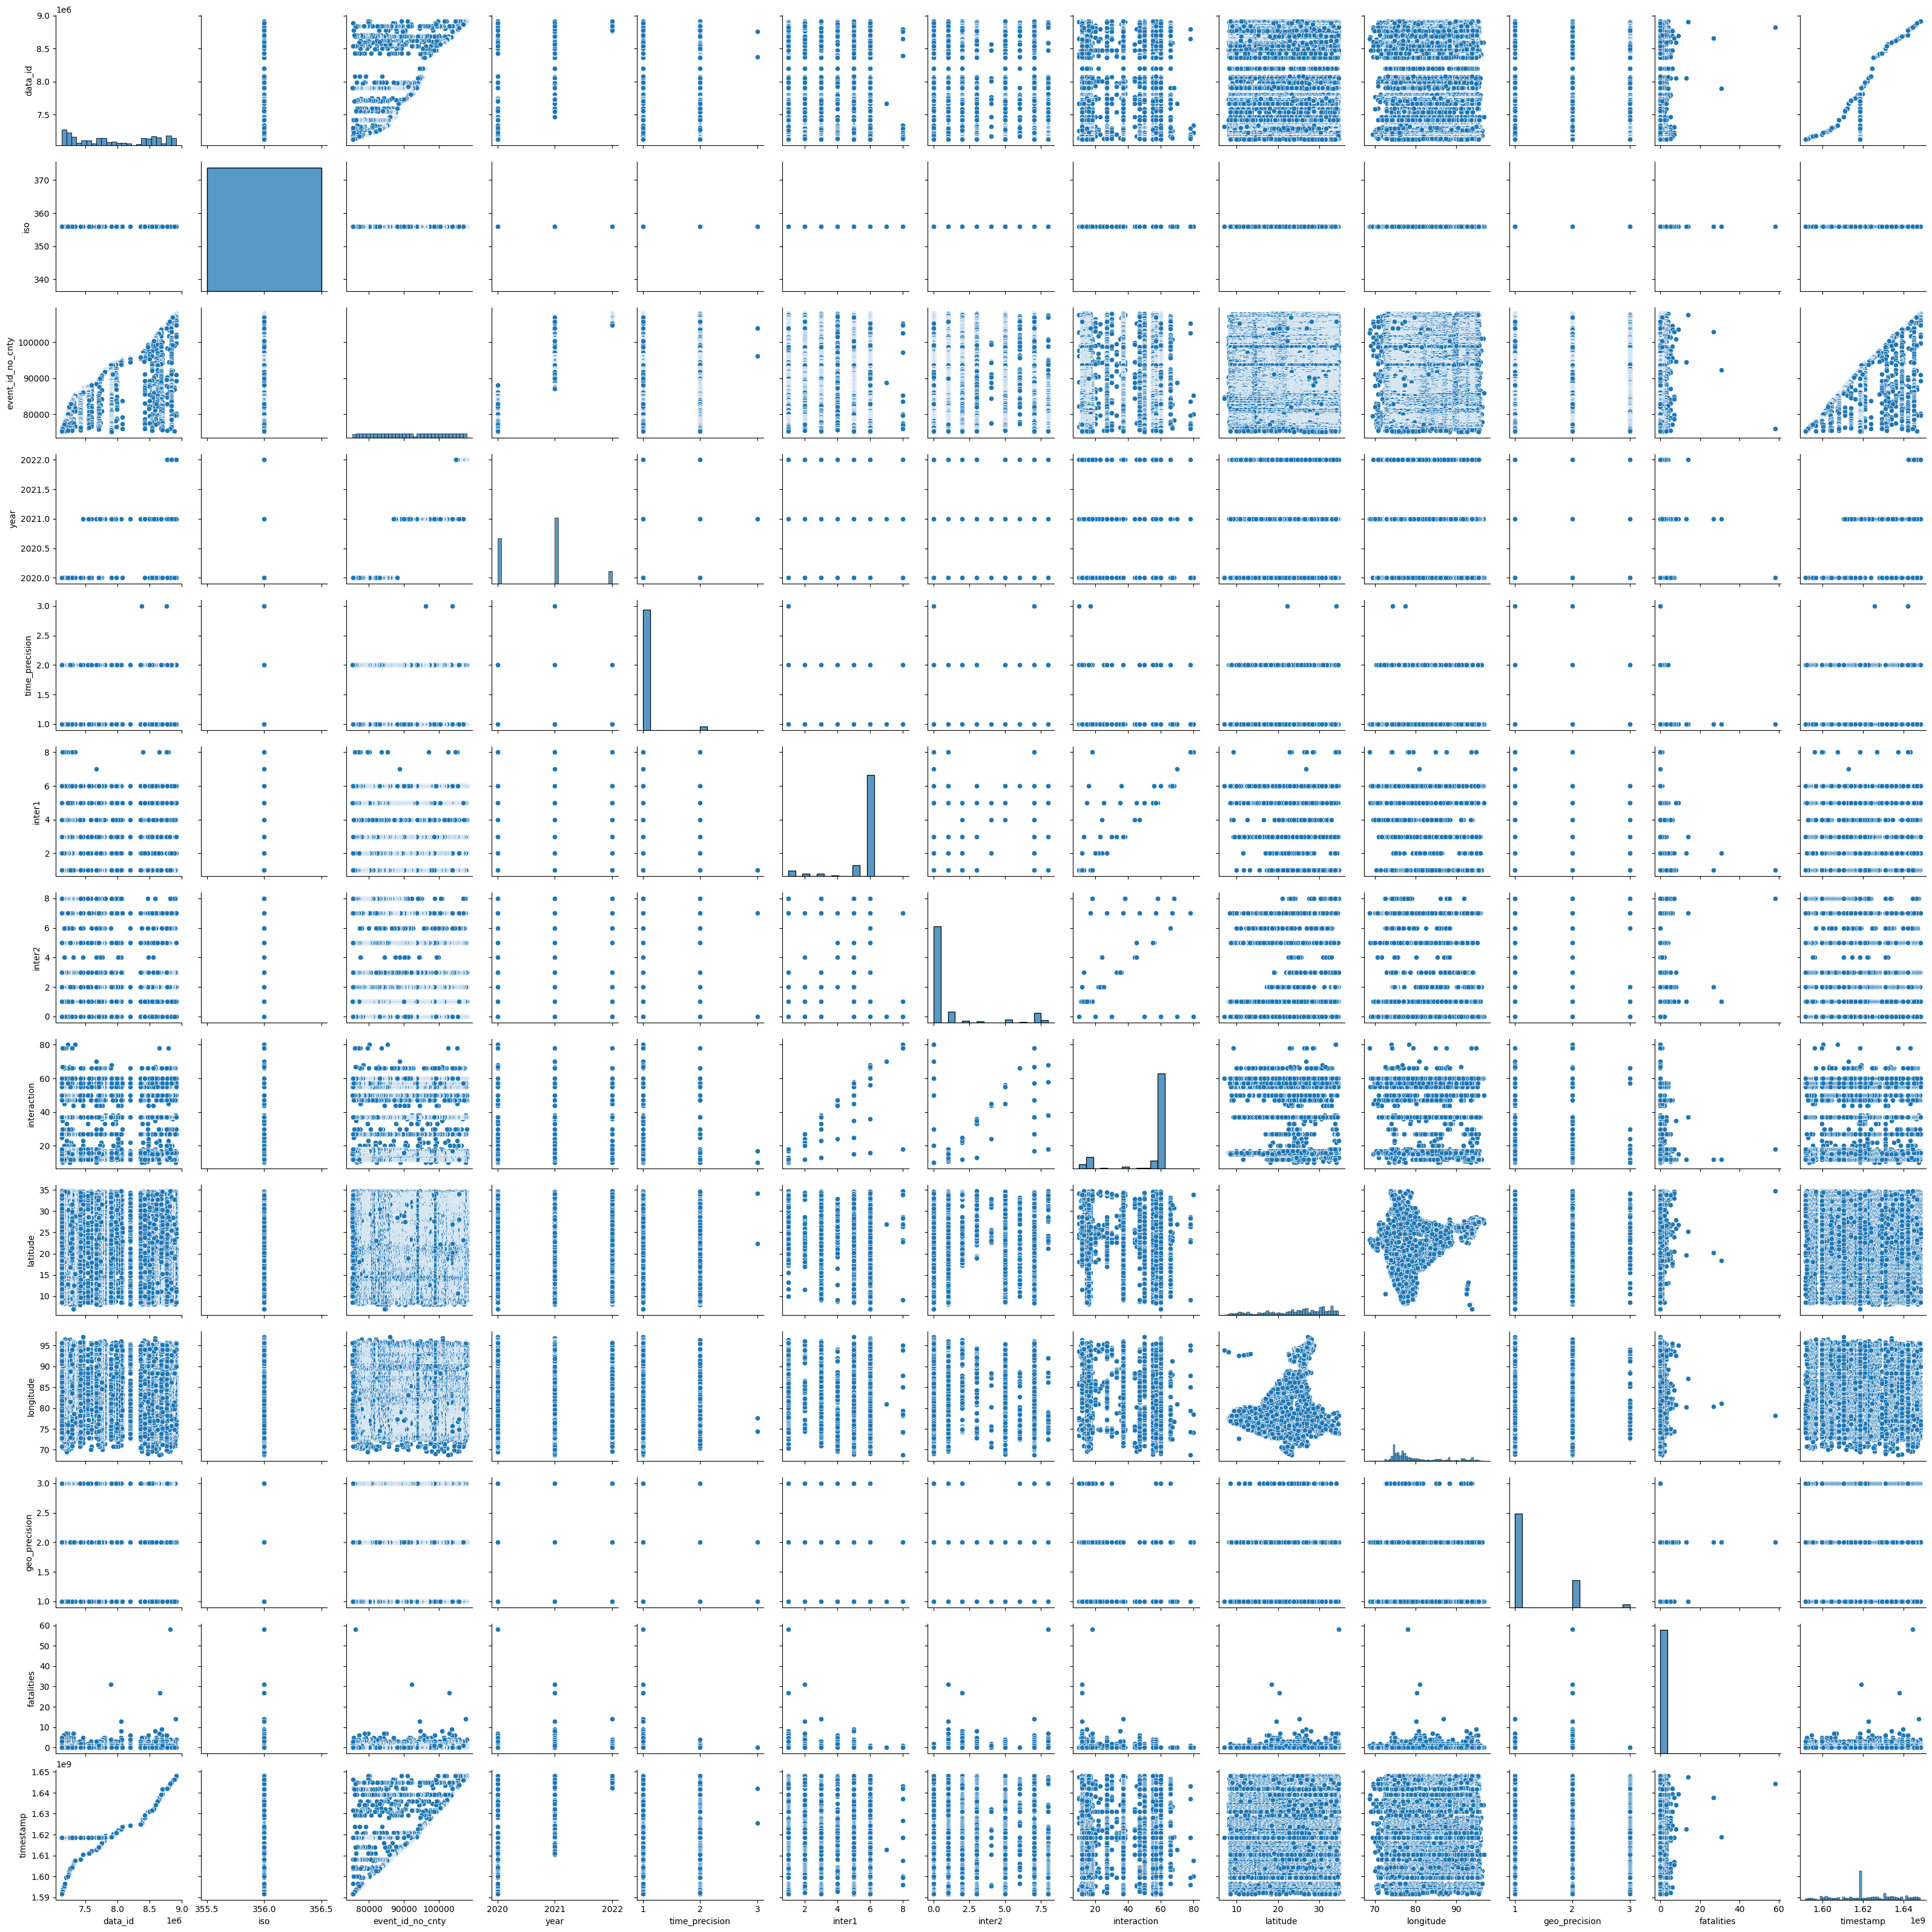

In [10]:
sns.pairplot(data)

***DATA VISUALISATION***

<Axes: >

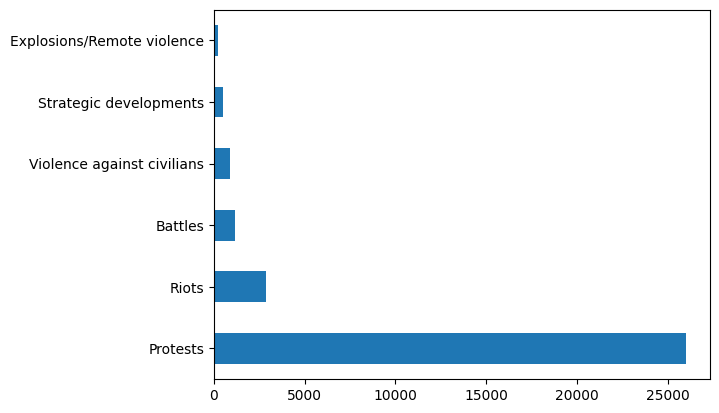

In [11]:
data['event_type'].value_counts().plot(kind='barh')

Protests are held more than 4000+ times in the year 2019-2022.

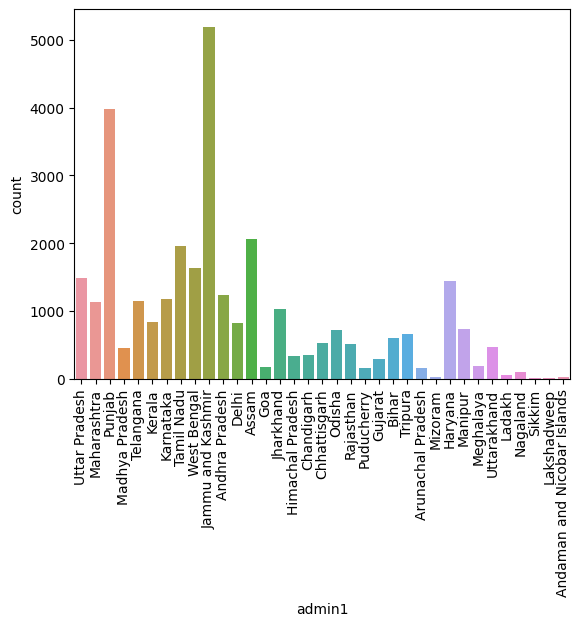

In [20]:
sns.countplot(x='admin1',data=data)
plt.xticks(rotation=90)
plt.show()

Jammu Kashmir has the maximum activities continued with Punjab continued with Assam, Tamil Nadu and Uttar Pradesh.

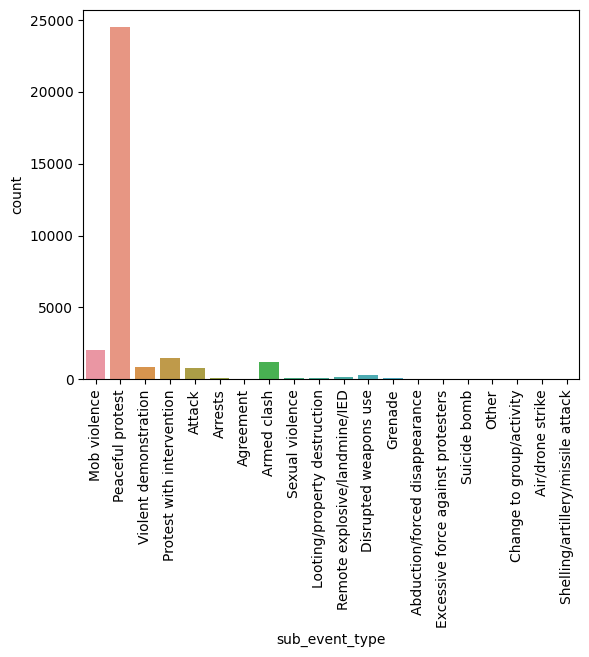

In [21]:
sns.countplot(x='sub_event_type',data=data)
plt.xticks(rotation=90)
plt.show()